In [1]:
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

To build the Relative Strength Index (RSI), we first define the period over which it is calculated—typically 14 periods by default.
Next, we set the overbought and oversold thresholds, which are commonly 70 and 30, respectively.

The RSI oscillates between 0 and 100, and it is used to identify potential reversal points in the price of an asset:

When the RSI rises above 70, it indicates that the asset may be overbought, and a downward correction could follow.

When the RSI falls below 30, it suggests the asset may be oversold, and a price rebound might occur.

C:\Users\Ferna\AppData\Local\Temp\ipykernel_5768\3743005246.py:8: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(TICKER)
[*********************100%***********************]  1 of 1 completed


Price            Close        High         Low        Open    Volume  \
Date                                                                   
2025-05-21  582.859985  592.580017  581.820007  588.440002  95197700   
2025-05-22  583.090027  586.619995  581.409973  582.659973  70860400   
2025-05-23  579.109985  581.809998  575.599976  575.979980  76029000   
2025-05-27  591.150024  591.309998  578.429993  586.070007  72588500   
2025-05-28  587.729980  592.770020  586.989990  591.559998  68445500   
2025-05-29  590.049988  593.200012  586.070007  593.059998  69973300   
2025-05-30  589.390015  591.130005  583.239990  588.929993  90601200   
2025-06-02  592.710022  592.789978  585.059998  587.760010  61630500   
2025-06-03  596.090027  597.080017  591.849976  592.340027  63606200   
2025-06-04  595.929993  597.950012  595.489990  596.960022  57314200   
2025-06-05  593.049988  599.000000  591.049988  597.630005  92278700   
2025-06-06  599.140015  600.830017  596.859985  598.659973  6658

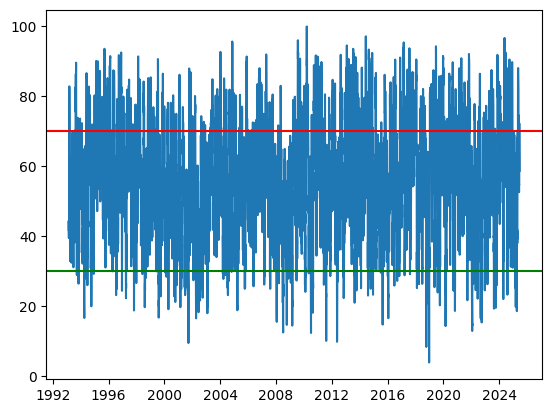

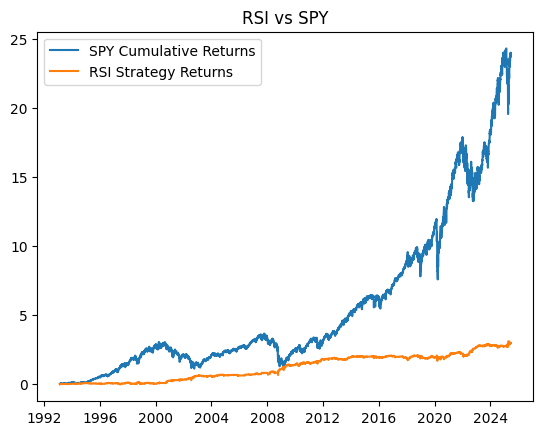

In [ ]:
TICKER = 'SPY'
RSI_LENGHT = 14
OVERBOUGHT = 70 
OVERSOLD = 30
LOOKBACK = 10000

def get_data():
    df = yf.download(TICKER)
    df.columns = df.columns.get_level_values(0)

    return df.iloc[-LOOKBACK:,:] #Take a piece of the last "LOOKBACK" rows

def add_RSI(df, lenght = RSI_LENGHT):

    price_change = df['Close'].diff() #diff() => current value - previous value

    # Separate gains/losses
    gain = price_change.where(price_change > 0, 0)
    loss = - price_change.where(price_change < 0, 0)

    # Average gain vs loss
    avg_gain = gain.rolling(window = lenght).mean()
    avg_loss = loss.rolling(window = lenght).mean()

    # Calculate RSI
    rs = avg_gain/avg_loss # what % of the avg loss is the avg gain
    rsi = 100 - (100/(1 + rs))

    df['RSI'] = rsi

    # plot the RSI
    plt.plot(df['RSI'])
    plt.axhline(OVERBOUGHT, color = 'red')
    plt.axhline(OVERSOLD, color = 'green') 

    return df.dropna()

def add_strategy(df, overbought = OVERBOUGHT, oversold = OVERSOLD):

    df['Strategy'] = 0
    df['Strategy'] = np.where(df['RSI'] > overbought, -1, np.where(df['RSI'] < oversold, 1, 0))
    df['Strategy'] = df['Strategy'].shift(1)

    return df

def test_strategy(df, ticker = TICKER):
    df['Asset_Returns'] = (1 + df['Close'].pct_change()).cumprod() - 1
    df['Strategy_Returns'] = (1 + df['Close'].pct_change() * df['Strategy']).cumprod() - 1

    plt.figure() # Make sure we can see our second plot
    plt.plot(df['Asset_Returns'])
    plt.plot(df['Strategy_Returns'])
    plt.legend([f'{ticker} Cumulative Returns', 'RSI Strategy Returns'])
    plt.title(f'RSI vs {ticker}')

    return df


def main():
    df = get_data()
    df = add_RSI(df)
    df = add_strategy(df)
    df = test_strategy(df)
    print(df.tail(20))

    return df

df = main()
